In [1]:
# استيراد المكتبات
import pandas as pd
import numpy as np
from google.colab import files

# تحميل الملف
uploaded = files.upload()
data = pd.read_csv("BikeSharing.csv")

# عرض أول 5 صفوف لفحص البيانات
print("First 5 rows of the dataset:")
print(data.head())

# عرض معلومات عامة عن البيانات
print("\nDataset info:")
print(data.info())

# التأكد من عدم وجود قيم مفقودة
print("\nMissing values in each column:")
print(data.isnull().sum())

# Step 3: Encode Categorical Variables
# تحديد الأعمدة ذات القيم الفئوية
categorical_columns = ['season', 'holiday', 'workingday', 'weather']

# تطبيق one-hot encoding لتحويل القيم الفئوية إلى صيغة عددية
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# عرض البيانات بعد التشفير
print("\nFirst 5 rows after One-Hot Encoding:")
print(data_encoded.head())


Saving BikeSharing.csv to BikeSharing.csv
First 5 rows of the dataset:
              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Nul

   season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   casual  registered  count  year  month  day  hour  minute  second  
0       3          13     16  2011      1    1     0       0       0  
1       8          32     40  2011      1    1     1       0       0  
2       5          27     32  2011      1    1     2       0       0  
3       3          10     13  2011      1    1     3       0       0  
4       0           1      1  2011      1    1     4       0       0  


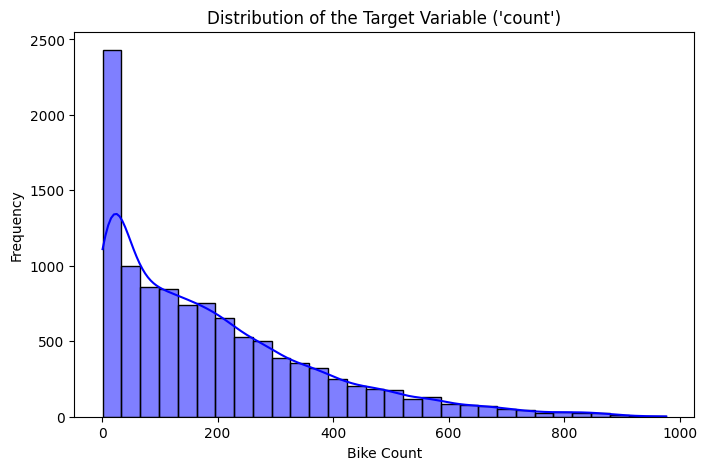

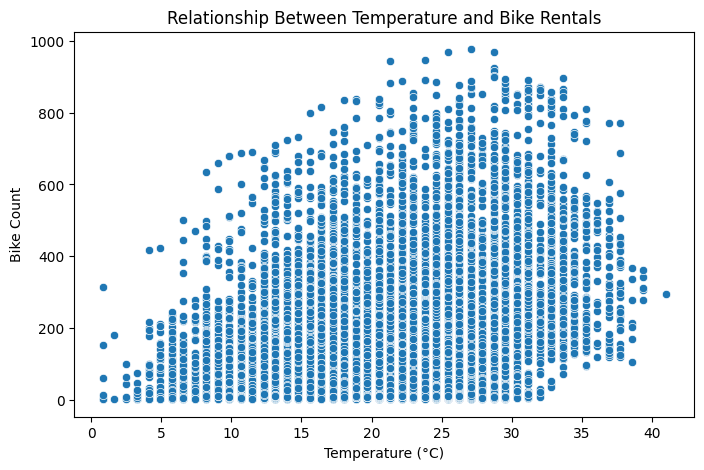

<ipython-input-2-545655e36e9f>:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data['season'], y=data['count'], ci=None, palette='coolwarm')
<ipython-input-2-545655e36e9f>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['season'], y=data['count'], ci=None, palette='coolwarm')


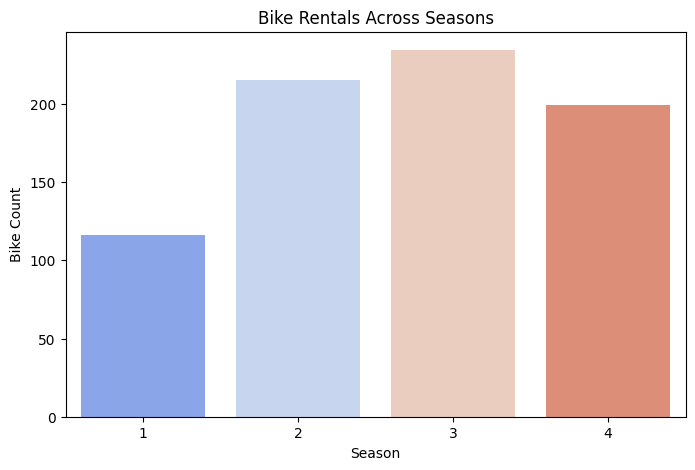

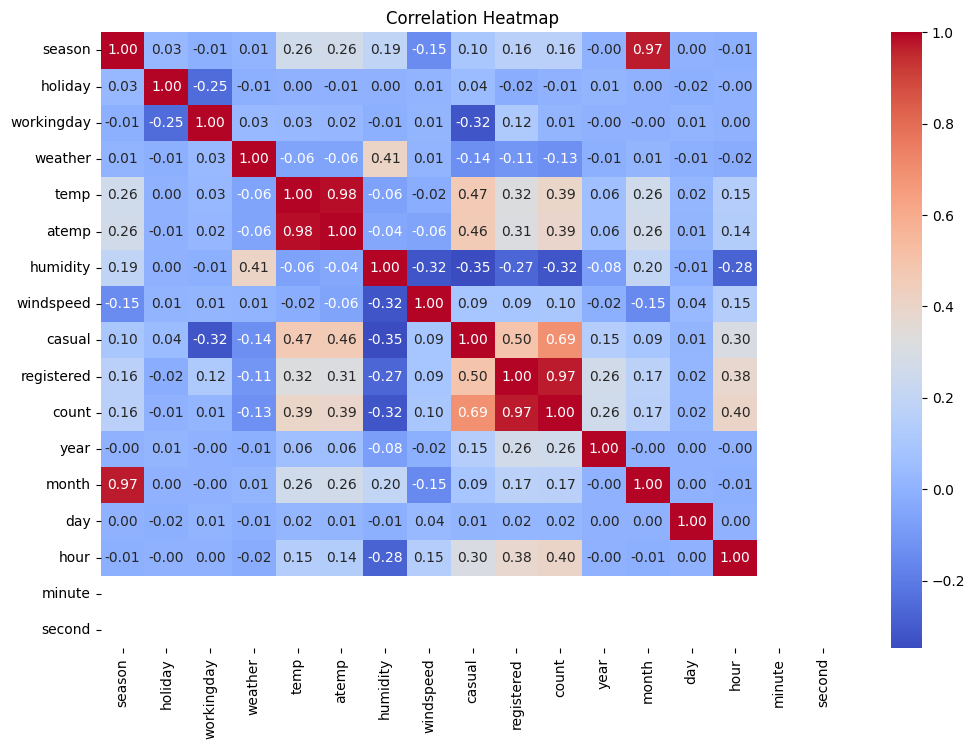

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# تحويل القيم غير الصالحة إلى NaT (Not a time)
data['datetime'] = pd.to_datetime(data['datetime'], errors='coerce')

# إزالة الصفوف التي تحتوي على NaT في العمود datetime
data = data.dropna(subset=['datetime'])

# تحويل العمود datetime إلى مكونات تاريخ ووقت
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data['minute'] = data['datetime'].dt.minute
data['second'] = data['datetime'].dt.second

# حذف العمود الأصلي datetime بعد استخراج البيانات
#لانه لم يعد ضروريا
data = data.drop(columns=['datetime'])

# طباعة البيانات الجديدة
print(data.head())

# Step 2: Exploratory Data Analysis (EDA)
# 1. Analyze the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(data['count'], kde=True, bins=30, color='blue')
plt.title("Distribution of the Target Variable ('count')")
plt.xlabel('Bike Count')
plt.ylabel('Frequency')
plt.show()
# استخدمت(sns.histplot) لتحليل تزويع المتغير
# يوضح هذا المخطط كيف تتوزع القيم المختلفة لعدد الدراجات المستاجرة في ال data#
# 2. Analyze Relationships
# Scatter plot for 'temp' vs. 'count'
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['temp'], y=data['count'])
plt.title("Relationship Between Temperature and Bike Rentals")
plt.xlabel('Temperature (°C)')
plt.ylabel('Bike Count')
plt.show()
# (sns.scatterplot) من هذا المخطط يمكن الملاحظة ما اذا كانت هناك علاقة بين الزيادة في درجة الحرارة او انخفاض في عدد الدراجات المستاجرة

# Bar plot for 'season' vs. 'count'
plt.figure(figsize=(8, 5))
sns.barplot(x=data['season'], y=data['count'], ci=None, palette='coolwarm')
plt.title("Bike Rentals Across Seasons")
plt.xlabel('Season')
plt.ylabel('Bike Count')
plt.show()
# (sns.barplot) يظهر توزيع الدراجات المستاجرة عبر المواسم المختلفة , يساعد في فهم كيف يؤثر الموسم على عدد الدراجات
# 3. Correlation Analysis
# Compute the correlation matrix
correlation_matrix = data.corr()
# توضح كيفية ارتباط المتغيرات المختلفة ببعضها البعض

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap")
plt.show()
# (sns.heatmap) توضح العلاقة بين المتغيرات بشكل مرئي ,
# القيم الاعلى من 0 تعنى علاقة ايجابية اما القيم السلبية تعني علاقة عكسية


In [3]:
#3.Data Preparation for Modeling:
#Feature Selection and Splitting
from sklearn.model_selection import train_test_split
target = 'count'
features = data_encoded.drop(columns=[target])

# تقسيم البيانات إلى مجموعة تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(
    features, data_encoded[target], test_size=0.2, random_state=42)
# نقوم بتقسيم البيانات إلى مجموعتين:
# X_train و X_test: تحتويان على البيانات المدخلة
# y_train و y_test: تحتويان على القيم المستهدفة (عدد الدراجات المستأجرة).
# test_size=0.2: يعني أن 20% من البيانات ستستخدم لاختبار النموذج بينما سيستخدم 80% للتدريب
# random_state=42: هو قيمة ثابتة لضمان أن عملية التقسيم تكون متسقة عند إعادة تشغيل الكود.

# طباعة حجم مجموعات البيانات
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


#Optional: Scaling the Features:
from sklearn.preprocessing import StandardScaler
X_train = X_train.select_dtypes(include=['float64', 'int64'])
X_test = X_test.select_dtypes(include=['float64', 'int64'])

# معالجة القيم المفقودة إن وجدت
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

scaler = StandardScaler()

# تطبيق التقييس على مجموعة التدريب والاختبار
X_train_scaled = scaler.fit_transform(X_train)
# fit_transform: يتم حساب الوسط الحسابي والانحراف المعياري من مجموعة التدريب ثم تطبيق التقييس على X_train

X_test_scaled = scaler.transform(X_test)
# fit_transform: يتم حساب الوسط الحسابي والانحراف المعياري من مجموعة التدريب ثم تطبيق التقييس على X_train
#Training a Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = LinearRegression()
# هنا نقوم بإنشاء نموذج الانحدار الخطي باستخدام LinearRegression من مكتبة sklearn.linear_model.

# تدريب النموذج
model.fit(X_train_scaled, y_train)
# نقوم بتدريب النموذج باستخدام مجموعة التدريب X_train_scaled (الميزات المُقاسة) و y_train (القيم المستهدفة).


# التنبؤ باستخدام مجموعة الاختبار
y_pred = model.predict(X_test_scaled)
# نستخدم النموذج المدرب للتنبؤ بالقيم المستهدفة (عدد الدراجات المستأجرة) على X_test_scaled (البيانات الاختبارية) للحصول على y_pred.

# تقييم النموذج
print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred):.2f}")
# MAE): يقيس متوسط الفرق بين القيم الحقيقية والقيم المتوقعة.
# mean_squared_error (MSE): يقيس متوسط مربع الفروق بين القيم الحقيقية والقيم المتوقعة. يتم استخدامه لتحديد مدى دقة النموذج.
# R^2 Score: هو مقياس يحدد نسبة التباين في القيم المستهدفة التي يفسرها النموذج. قيمة R² بالقرب من 1 تعني أن النموذج يفسر معظم التباين، في حين أن قيمة R² بالقرب من 0 تعني أن النموذج لا يفسر التباين بشكل جيد

Training set size: 8708 samples
Test set size: 2178 samples
Model Evaluation:
Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
R^2 Score: 1.00


      y_test  y_pred     residuals         error
6194     513   513.0 -2.273737e-13  2.273737e-13
434        2     2.0 -2.273737e-13  2.273737e-13
6840     604   604.0 -2.273737e-13  2.273737e-13
7952     800   800.0  2.273737e-13  2.273737e-13
318      139   139.0 -1.989520e-13  1.989520e-13
...      ...     ...           ...           ...
6729     685   685.0 -2.273737e-13  2.273737e-13
4993       1     1.0 -1.989520e-13  1.989520e-13
3181     128   128.0  2.700062e-13  2.700062e-13
8191     365   365.0  2.273737e-13  2.273737e-13
7991     713   713.0  2.273737e-13  2.273737e-13

[66 rows x 4 columns]


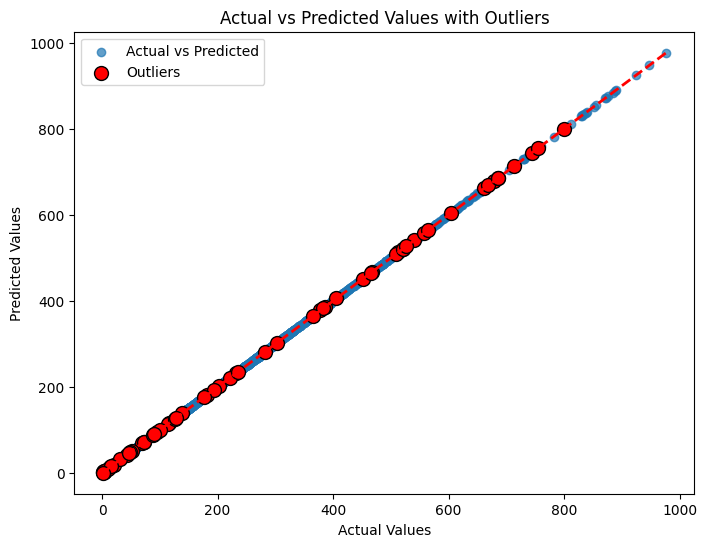

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# إنشاء DataFrame يحتوي على القيم الحقيقية (y_test) والقيم المتنبأ بها (y_pred)
results_df = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred
})

# حساب  (residuals) و (error)
results_df['residuals'] = results_df['y_test'] - results_df['y_pred']
results_df['error'] = abs(results_df['residuals'])
# rasiduals : الفرق بين (y_test) , (y_pred)
# وتساعد في قياس مدى دقة النموذج في التنبؤ
# error: يظهر حجم الخطا بغض النظر عن الاتجاه (ايجابي او سلبي)

# تحديد القيم الشاذة (outliers)
outliers = results_df[results_df['error'] > results_df['error'].quantile(0.95)]
print(outliers)
# يتم تعريف القيم الشاذة على انها النقاط التي يزيد فيها الخطأ عن 95%


# رسم بياني لعرض القيم الحقيقية مقابل القيم المتنبأ بها
plt.figure(figsize=(8, 6))


# رسم النقاط العامة (غير الشاذة)
plt.scatter(results_df['y_test'], results_df['y_pred'], alpha=0.7, label='Actual vs Predicted')
# يتم رسم النقاط التي تمثل العلاقة بين (y_test) , (y_pred)
# alpha=0.7: لجعل النقاط شفافة قليلا

# رسم النقاط الشاذة (outliers) باللون الأحمر
plt.scatter(outliers['y_test'], outliers['y_pred'], color='red', label='Outliers', edgecolor='black', s=100)

# إضافة خط مرجعي (خط الـ 45 درجة)
plt.plot([results_df['y_test'].min(), results_df['y_test'].max()],
         [results_df['y_test'].min(), results_df['y_test'].max()],
         color='red', linestyle='--', lw=2)  # خط الارتباط المثالي (خط الـ 45 درجة)
# هذا الخط يمثل العلاقة المثالية حيث تكون القيم الحقيقية مساوية للقيم المتنبأ بها

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Outliers')
plt.legend()

# عرض الرسم البياني
plt.show()